In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Mean shift Clustering Estimation

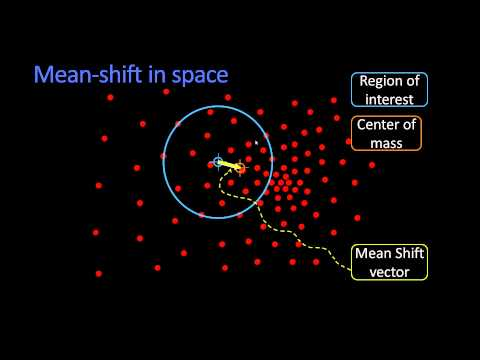

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('TMPEujQrY70', height='500', width='800', start =58)

- 평균 이동은 데이터의 분포도를 이용해 군집 중심점을 Find
- 확률밀도함수(PDF)를 기반으로 가장 집중적으로 데이터가 모여있는 pdf가 피크인 점을 군집 중심점으로 선정
- 확률 밀도함수는 KDE(Kernel Density Estimation)을 이용

- 평균 이동 알고리즘은 임의의 포인트에서 시작해 이러한 피크 포인트를 찾을 때까지 KDE를 반복적으로 적용하며 군집화를 수행
- 평균 이동은 K-평균과 다르게 군집의 개수를 지정할 필요가 없음
- MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요하다.
- 사이킷런은 최적화된 bandwidth 값을 찾기 위해 estimate_bandwidth()의 파라미터로 데이터셋을 입력하면 최적화된 bandwidth 값을 반환
- bandwidth(대역폭)의 크기에 따라 알고리즘 자체에서 군집의 개수를 최적으로 하기위한 MeanShift 클래스를 사용

## A demo of the mean-shift clustering algorithm
https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html

In [ ]:
estimate_bandwidth()

number of estimated clusters : 3


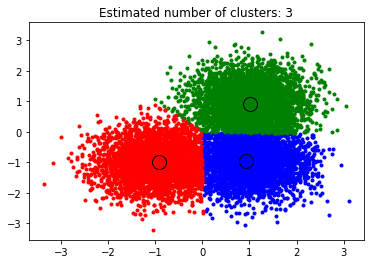

In [15]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Comparing different clustering algorithms on toy datasets

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'>

# END